In [31]:
# check installed version
import pycaret
# import pycaret clustering and init setup
from pycaret.clustering import *
import pandas as pd
import datetime

pycaret.__version__

'3.0.4'

### ingest and setup

In [5]:
m2_pipeline = pd.read_csv('pipeline1.csv')

In [7]:
#HOME
s = setup(m2_pipeline, session_id = 42)

,Description,Value
0,Session id,42
1,Original data shape,"(5571, 21)"
2,Transformed data shape,"(5571, 21)"
3,Numeric features,19
4,Categorical features,2
5,Rows with missing values,0.0%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [8]:
# import ClusteringExperiment and init the class
from pycaret.clustering import ClusteringExperiment
exp = ClusteringExperiment()

In [9]:
# check the type of exp
type(exp)


pycaret.clustering.oop.ClusteringExperiment

In [10]:
# init setup on exp
exp.setup(m2_pipeline, session_id = 42)

,Description,Value
0,Session id,42
1,Original data shape,"(5571, 21)"
2,Transformed data shape,"(5571, 21)"
3,Numeric features,19
4,Categorical features,2
5,Rows with missing values,0.0%
6,Preprocess,True
7,Imputation type,simple
8,Numeric imputation,mean
9,Categorical imputation,mode


In [13]:
# to check all the available models
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


### initiate clustering algo

In [26]:
# train kmeans model
m = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5837,27689.4859,0.4959,0,0,0


### assign model

In [27]:
cluster = assign_model(m)
cluster

,group,time,s_MP,change,type,length,sum_change,s_area,surge_area,p_group,...,p_type,p_MP,p_buyCap,p_askCap,p_totalBidVol,p_totalAskVol,p_length,p_sum_change,p_area,Cluster
0,1,1.660222e+12,29.990000,0.317588,surge,1,0.317588,0.317588,0.317588,2.0,...,precursor,30.000000,7349599.50,1.229796e+09,716681.93750,314676.406250,6.0,-0.004943,-0.029656,Cluster 2
1,3,1.660222e+12,29.850000,0.000469,surge,1,0.000469,0.000469,0.000469,4.0,...,precursor,29.900000,7307990.00,1.229792e+09,715352.87500,314642.843750,1.0,0.000402,0.000402,Cluster 2
2,5,1.660222e+12,29.870001,0.001105,surge,2,0.001607,0.003214,0.003214,6.0,...,precursor,29.920000,7285245.00,1.229754e+09,714476.12500,313576.000000,4.0,-0.002773,-0.011090,Cluster 2
3,7,1.660222e+12,29.889999,0.001610,surge,1,0.001610,0.001610,0.001610,8.0,...,precursor,29.879999,7318707.00,1.229744e+09,715730.56250,313546.593750,2.0,-0.000200,-0.000400,Cluster 2
4,9,1.660223e+12,29.900000,0.001372,surge,1,0.001372,0.001372,0.001372,10.0,...,precursor,29.930000,7280582.00,1.229794e+09,714140.12500,314889.375000,7.0,-0.013670,-0.095690,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5566,11133,1.691438e+12,12.430000,0.000805,surge,3,0.002010,0.006031,0.006031,11134.0,...,precursor,12.450000,1230808.25,1.275139e+07,305097.15625,250228.953125,8.0,-0.002408,-0.019265,Cluster 3
5567,11135,1.691441e+12,12.430000,0.001530,surge,1,0.001530,0.001530,0.001530,11136.0,...,precursor,12.450000,1239702.00,1.274492e+07,305865.50000,249742.609375,1.0,-0.000401,-0.000401,Cluster 3
5568,11137,1.691442e+12,12.440000,0.000564,surge,1,0.000564,0.000564,0.000564,11138.0,...,precursor,12.430000,1210140.50,1.275866e+07,303521.28125,250877.562500,2.0,-0.002653,-0.005306,Cluster 3
5569,11139,1.691443e+12,12.410000,0.002981,surge,1,0.002981,0.002981,0.002981,11140.0,...,precursor,12.460000,1227623.75,1.274296e+07,304847.25000,249542.218750,1.0,-0.000720,-0.000720,Cluster 3


### push clustered df to csv (Finish pipeline step)

In [39]:
# setup storage string

now = datetime.datetime.now()
print("Current date and time: ")
print(now.strftime("%Y-%m-%d %H:%M:%S"))

model_type = 'kmeans'
run_time = now.strftime("%Y-%m-%d %H:%M:%S")
file_name = 'clustered/'+ 'clustered_'+ model_type+' _'+ run_time+ '.csv'
print(file_name)
cluster.to_csv(file_name)

Current date and time: 
2023-08-14 09:31:34
clustered/clustered_kmeans _2023-08-14 09:31:34.csv


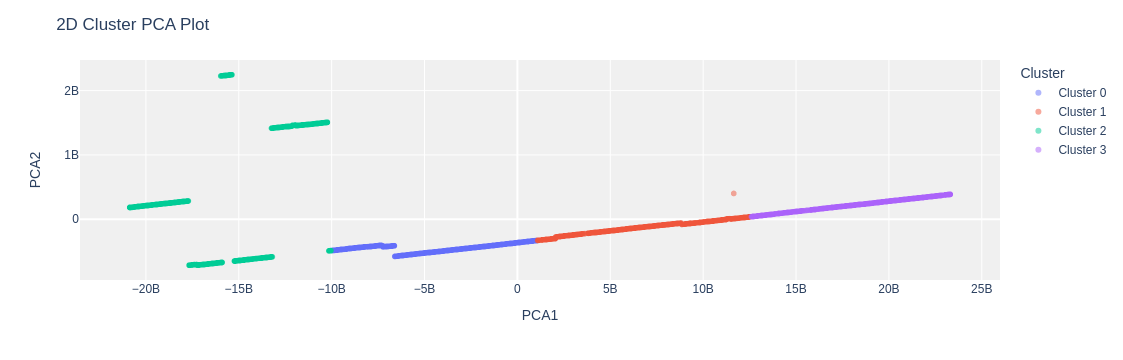

In [28]:
# plot pca cluster plot 
plot_model(m, plot = 'cluster')

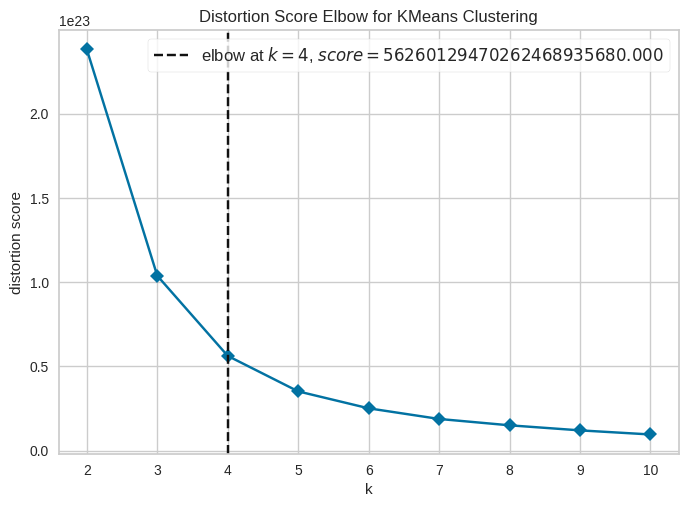

In [41]:
# plot elbow
plot_model(m, plot = 'elbow')

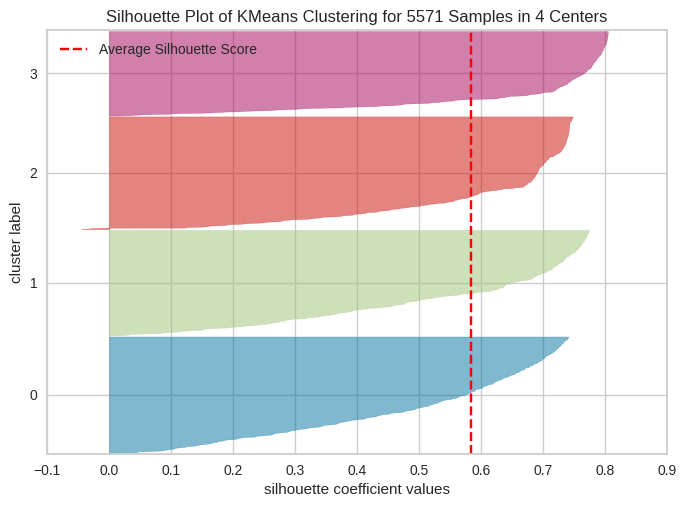

In [42]:
# plot silhouette
plot_model(m, plot = 'silhouette')

In [43]:
evaluate_model(m)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [45]:
# predict on test set
sc_pred = predict_model(m, data=m2_pipeline)
sc_pred

,group,time,s_MP,change,type_surge,length,sum_change,s_area,surge_area,p_group,...,p_type_precursor,p_MP,p_buyCap,p_askCap,p_totalBidVol,p_totalAskVol,p_length,p_sum_change,p_area,Cluster
0,1.0,1.660222e+12,29.99,0.317588,1.0,1.0,0.317588,0.317588,0.317588,2.0,...,1.0,30.000000,7.349600e+06,1.229796e+09,716681.930000,314676.400000,6.000000,-0.004943,-0.029656,Cluster 2
1,3.0,1.660222e+12,29.85,0.000469,1.0,1.0,0.000469,0.000469,0.000469,4.0,...,1.0,29.900000,7.307990e+06,1.229792e+09,715352.870000,314642.840000,1.000000,0.000402,0.000402,Cluster 2
2,5.0,1.660222e+12,29.87,0.001105,1.0,2.0,0.001607,0.003214,0.003214,6.0,...,1.0,29.920000,7.285245e+06,1.229754e+09,714476.100000,313575.990000,4.000000,-0.002773,-0.011090,Cluster 2
3,7.0,1.660222e+12,29.89,0.001610,1.0,1.0,0.001610,0.001610,0.001610,8.0,...,1.0,29.880000,7.318707e+06,1.229744e+09,715730.560000,313546.580000,2.000000,-0.000200,-0.000400,Cluster 2
4,9.0,1.660223e+12,29.90,0.001372,1.0,1.0,0.001372,0.001372,0.001372,10.0,...,1.0,29.930000,7.280582e+06,1.229794e+09,714140.130000,314889.390000,7.000000,-0.013670,-0.095690,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5566,11133.0,1.691438e+12,12.43,0.000805,1.0,3.0,0.002010,0.006031,0.006031,11134.0,...,1.0,12.450000,1.230808e+06,1.275139e+07,305097.170000,250228.950000,8.000000,-0.002408,-0.019265,Cluster 3
5567,11135.0,1.691441e+12,12.43,0.001530,1.0,1.0,0.001530,0.001530,0.001530,11136.0,...,1.0,12.450000,1.239702e+06,1.274492e+07,305865.490000,249742.610000,1.000000,-0.000401,-0.000401,Cluster 3
5568,11137.0,1.691442e+12,12.44,0.000564,1.0,1.0,0.000564,0.000564,0.000564,11138.0,...,1.0,12.430000,1.210140e+06,1.275867e+07,303521.280000,250877.570000,2.000000,-0.002653,-0.005306,Cluster 3
5569,11139.0,1.691443e+12,12.41,0.002981,1.0,1.0,0.002981,0.002981,0.002981,11140.0,...,1.0,12.460000,1.227624e+06,1.274296e+07,304847.250000,249542.220000,1.000000,-0.000720,-0.000720,Cluster 3
